In [38]:
import datetime

#set max columns displayed to 100
pd.set_option('display.max_columns',100)

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# First, let's import the train dataset: daily historical data from January 2013 to October 2015.

sales = pd.read_csv('./Data/competitive-data-science-predict-future-sales/sales_train.csv')

In [3]:
sales.shape

(2935849, 6)

In [4]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [11]:
# Per Kaggle documentation, the columns in this dataset are:

# shop_id - unique identifier of a shop
# item_id - unique identifier of a product
# item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
# item_price - current price of an item
# date - date in format dd/mm/yyyy
# date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33

In [9]:
# Let's conver the date column from string to datetime type

sales.date = sales.date.apply(lambda x:datetime.datetime.strptime(x, '%d.%m.%Y'))

In [10]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [22]:
# Determine if there are any null values in the dataset
sales.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

In [15]:
# Determine the number of unique shop_id values in the dataset
len(sales.shop_id.value_counts())

60

In [16]:
# Determine the number of unique item_id values in the dataset
len(sales.item_id.value_counts())

21807

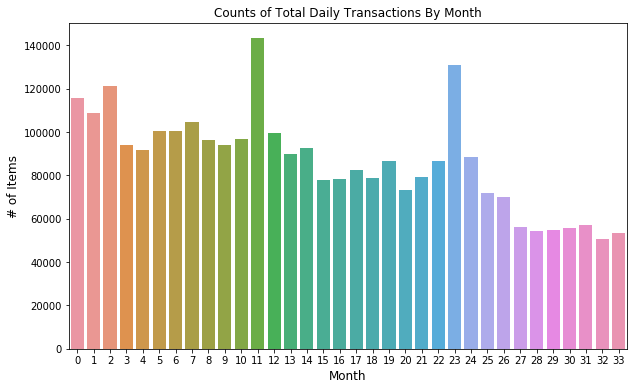

In [30]:
# Check how many total sales transactions there are in each month
monthly_sales_totals = sales.date_block_num.value_counts()
plt.figure(figsize=(10,6))
ax = sns.barplot(monthly_sales_totals.index, monthly_sales_totals.values)
plt.title("Counts of Total Daily Transactions By Month")
plt.ylabel("# of Items", fontsize=12)
plt.xlabel("Month", fontsize=12)
plt.show()

In [42]:
#sales.groupby('shop_id')['date_block_num'].agg(['min','max'])
# Check distribution of month of transaction values for each shop
sales.groupby('shop_id')['date_block_num'].describe().T

shop_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,9857.000000,5678.000000,25991.000000,25532.000000,38242.000000,38179.000000,82663.000000,58076.000000,3412.000000,3751.000000,21397.000000,499.0,34694.000000,17824.000000,36979.000000,59511.000000,52734.000000,22950.000000,53227.000000,63911.000000,1792.000000,58133.000000,45434.000000,6963.000000,53032.000000,186104.000000,53910.000000,105366.000000,142234.000000,49225.000000,50860.000000,235636.000000,7947.000000,5027.000000,5752.000000,58445.000000,306.0,39638.000000,46013.000000,13440.000000,4257.000000,41967.000000,109253.000000,39282.000000,39530.000000,35891.000000,66321.000000,56695.000000,21612.000000,15849.000000,65173.000000,44433.000000,43502.000000,52921.000000,143480.000000,34769.000000,69573.000000,117428.000000,71441.000000,42108.000000
mean,0.513747,0.525537,16.691855,15.927424,14.507740,16.520574,14.063269,14.853365,0.866061,18.944548,14.182128,25.0,17.484407,8.456744,14.700533,14.258725,13.562768,14.227015,13.454600,14.484893,26.671875,16.161870,14.645134,1.455838,14.689207,15.066366,14.201428,14.513154,14.811283,12.077583,11.074479,14.935341,2.489493,22.950467,25.989221,15.249722,33.0,13.845653,15.883055,23.520833,19.662203,13.466080,16.135923,11.758133,13.824817,13.846424,14.360851,16.592927,23.830326,22.462300,12.459638,12.461166,14.641879,14.886699,11.852502,20.666513,14.301511,15.116378,15.726432,14.301320
std,0.499836,0.499391,9.547010,9.418781,9.549651,9.146677,9.330895,9.427724,0.814302,9.239632,9.400191,0.0,9.643071,5.431443,9.883468,9.416648,9.712060,5.544127,9.855083,9.548045,5.992693,9.580206,9.705284,1.104115,9.148441,9.728415,9.559257,8.786275,9.454782,8.199808,7.322799,9.544102,1.689229,1.883741,4.242381,9.494405,0.0,10.126074,9.655999,5.709685,3.279946,9.151204,9.779854,7.241830,9.341741,9.315826,9.456020,9.641717,5.209350,6.223397,8.846675,8.930045,9.437649,9.377312,7.832109,7.897850,9.329751,8.872493,8.875159,9.560465
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,9.000000,0.000000,25.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,18.000000,0.000000,33.0,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,2.000000,2.000000,0.000000
25%,0.000000,0.000000,9.000000,8.000000,7.000000,9.000000,6.000000,7.000000,0.000000,9.000000,6.000000,25.0,10.000000,4.000000,6.000000,6.000000,5.000000,10.000000,5.000000,6.000000,21.000000,8.000000,6.000000,0.000000,7.000000,7.000000,6.000000,7.000000,7.000000,5.000000,5.000000,7.000000,1.000000,22.000000,23.000000,7.000000,33.0,4.000000,8.000000,19.000000,17.000000,6.000000,8.000000,6.000000,6.000000,6.000000,6.000000,9.000000,19.000000,17.000000,5.000000,5.000000,7.000000,7.000000,5.000000,15.000000,6.000000,7.000000,8.000000,6.000000
50%,1.000000,1.000000,17.000000,16.000000,14.000000,16.000000,13.000000,14.000000,1.000000,21.000000,13.000000,25.0,18.000000,8.000000,14.000000,13.000000,12.000000,14.000000,11.000000,13.000000,21.000000,16.000000,13.000000,1.000000,13.000000,14.000000,13.000000,14.000000,14.000000,11.000000,11.000000,14.000000,2.000000,23.000000,26.000000,14.000000,33.0,12.000000,16.000000,23.000000,20.000000,12.000000,16.000000,11.000000,13.000000,12.000000,13.000000,17.000000,23.000000,23.000000,11.000000,11.000000,14.000000,14.000000,11.000000,22.000000,13.000000,14.000000,15.000000,13.000000
75%,1.000000,1.000000,24.000000,24.000000,23.000000,24.000000,22.000000,23.000000,2.000000,21.000000,22.000000,25.0,25.000000,13.000000,23.000000,22.000000,22.000000,19.000000,22.000000,23.000000,33.000000,24.000000,23.000000,2.000000,22.000000,23.0000

In [ ]:
sales.groupby(['shop_id','item_id'])['item_price']

In [12]:
# Aggregate to monthly level the required metrics
monthly_sales=sales.groupby(["date_block_num","shop_id","item_id"])[
    "date","item_price","item_cnt_day"].agg({"date":["min",'max'],"item_price":"mean","item_cnt_day":"sum"})

monthly_sales.head(20)

date            item_price item_cnt_day
                                      min        max       mean          sum
date_block_num shop_id item_id                                              
0              0       32      2013-01-03 2013-01-31      221.0          6.0
                       33      2013-01-03 2013-01-28      347.0          3.0
                       35      2013-01-31 2013-01-31      247.0          1.0
                       43      2013-01-31 2013-01-31      221.0          1.0
                       51      2013-01-13 2013-01-31      128.5          2.0
                       61      2013-01-10 2013-01-10      195.0          1.0
                       75      2013-01-17 2013-01-17       76.0          1.0
                       88      2013-01-16 2013-01-16       76.0          1.0
                       95      2013-01-06 2013-01-06      193.0          1.0
                       96      2013-01-10 2013-01-10       70.0          1.0
                       98      2013-01-04 2013-01-31      268.0         25.0
                       111     2013-01-17 2013-01-17       89.0          1.0
                       149     2013-01-11 2013-01-28       99.0          3.0
                       151     2013-01-16 2013-01-16       75.0          1.0
                       153     2013-01-09 2013-01-09      258.0          1.0
                       198     2013-01-10 2013-01-10      112.0          1.0
                       210     2013-01-05 2013-01-25      118.0          2.0
                       282     2013-01-04 2013-01-04      109.0          1.0
                       306     2013-01-22 2013-01-22       59.0          1.0
                       351     2013-01-21 2013-01-21       89.0          1.0